In [7]:
import pandas as pd

data = pd.read_csv('../one_hot_encoded_data.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [8]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,debt_settlement_flag_N,debt_settlement_flag_Y,settlement_status_ACTIVE,settlement_status_BROKEN,settlement_status_COMPLETE,settlement_status_No,next_pymnt_d_Apr-2019,next_pymnt_d_Feb-2019,next_pymnt_d_Mar-2019,next_pymnt_d_Unkown
0,10000.0,10000.0,10000.0,4.0,307.27,10.0,55000.0,Current,19.22,0.0,...,1,0,0,0,0,1,0,0,1,0
1,35000.0,35000.0,35000.0,18.0,770.63,10.0,200000.0,Current,17.80,1.0,...,1,0,0,0,0,1,0,0,1,0
2,9600.0,9600.0,9600.0,8.0,300.13,3.0,90000.0,Current,25.59,1.0,...,1,0,0,0,0,1,0,0,1,0
3,18000.0,18000.0,18000.0,6.0,557.52,10.0,70000.0,Current,5.55,0.0,...,1,0,0,0,0,1,0,0,1,0
4,12000.0,12000.0,12000.0,10.0,378.59,3.0,36500.0,Current,33.61,0.0,...,1,0,0,0,0,1,0,0,1,0


In [9]:
# convert one-hot encoded features to float type

for i in list(data.columns):
    if data[i].dtype == 'int64':
        data[i] = data[i].astype('float')

In [10]:
data.groupby('loan_status').size()

loan_status
Charged Off              591
Current               117603
Default                    2
Fully Paid              7472
In Grace Period          747
Late (16-30 days)        276
Late (31-120 days)      1503
dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict

In [18]:
pca = PCA(n_components=173)
x_pca = pca.fit_transform(data_input)
clf = RandomForestClassifier()
pred = cross_val_predict(clf, x_pca, data_target, cv=5)

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [19]:
pd_pred = pd.DataFrame(pred)

In [21]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np


def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig('confusion matrix LDA.png')
    return ax

Confusion matrix, without normalization
[[   558      2      0     31      0      0      0]
 [     0 117339      0     27    202     18     17]
 [     0      1      0      0      0      0      1]
 [     2      9      0   7460      1      0      0]
 [     0    697      0      3     34      7      6]
 [     0    238      0      1     24      5      8]
 [     0    247      0     25     23      7   1201]]


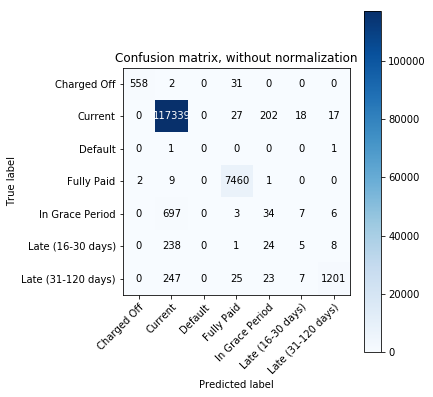

In [22]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
# data_target和pred1 都是pandas格式，array应该也可以
plot_confusion_matrix(data_target, pred, 
                      title='Confusion matrix, without normalization')

plt.show()